# Mini-Project 2 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Aya Mahmoud 

ID: 43-2422

Tutorial: T-02 BI

---

Name: Mohamed Rammah

ID: 43-12240

Tutorial: T-02 BI

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

Load the Dataset

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [4]:
df.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [5]:
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


Query 1

In [6]:
df.sort_values('danceability', ascending=False)['genres'].head(20)

1012          experimental house
1238                  guam indie
917                dutch hip hop
924                dutch rap pop
364     british children's music
1358            indie deutschrap
2743             trance mexicano
1072                    footwork
1119               funk paulista
2244                   proto-rap
2684              tamaulipas rap
756               danish hip hop
46               alberta hip hop
2449          serbian electronic
693          corridos cristianos
2755             trap venezolano
140        atmospheric post-rock
2969                     zouglou
1769                  miami bass
734           cumbia santafesina
Name: genres, dtype: object

Query 2

In [7]:
df.sort_values('energy', ascending=True)['genres'].head(20)

328                          brain waves
283                             binaural
1611              korean classical piano
2476                        singing bowl
1723                            medieval
1441            italian classical guitar
1895           native american spiritual
473            caucasian classical piano
150                   australian ambient
912                dutch classical piano
207               balkan classical piano
279                                bible
210                     baltic classical
327                          boy soprano
152                     australian choir
1184                ghanaian traditional
2913                          warm drone
678                   contemporary choir
72       american 21st century classical
1325    hungarian contemporary classical
Name: genres, dtype: object

Query 3

In [8]:
df.sort_values('loudness', ascending=False)['genres'].head(20)

1897     nederlandse hardstyle
18                 action rock
1747             memphis indie
2107           palestinian pop
1777       middle east hip hop
105             arabic hip hop
1510        japanese metalcore
286         birmingham hip hop
1473                    j-idol
1505       japanese indie rock
1514    japanese post-hardcore
2038               nz hardcore
2041                   nz punk
256             belarusian pop
257            belarusian rock
2953                  xtra raw
2003       norwegian punk rock
1583              kawaii metal
49                    alt-idol
2383             russian dance
Name: genres, dtype: object

Query 4

In [9]:
df.sort_values('liveness', ascending=False)['genres'].head(20)

1826              modular synth
1246             gujarati garba
2743            trance mexicano
1784                mindfulness
284                    birdsong
1931                 new comedy
797                 deep comedy
185                    autoharp
656                clean comedy
141          atmospheric sludge
139      atmospheric post-metal
920                  dutch jazz
1864           musica paraibana
1410                irish banjo
2924    west australian hip hop
1223                greek house
2079         organic electronic
1469                 j-acoustic
597       classic icelandic pop
2785               turkish trap
Name: genres, dtype: object

Query 5

In [10]:
df.sort_values('popularity', ascending=False)['genres'].head(20)

237                basshall
2778            turkish edm
2533    south african house
2755        trap venezolano
46          alberta hip hop
536      chinese electropop
37                afroswing
31                afro soul
2383          russian dance
1239               guaracha
1381           indie triste
575                 circuit
2800            uk diy punk
2102          pagode baiano
2337          ritmo kombina
2754            trap triste
2002      norwegian pop rap
2834         urbano espanol
1850         musica canaria
110       argentine hip hop
Name: genres, dtype: object

Clustering on which attributes is subjective, however liveness and popularity are totally irrevalant, they shouldn't be used for clustering. Using trial and error to get the best clusters, I culstered using energy, danceability, accousticness and loudness. I beleive that these tend to show the genre the most. Metal genres tend to be very loud and full of energy while classic songs seem to be the total opposite. I also used The silhouette coefficient to see how well the clusters are separated

Clustering

In [11]:
df_cluster=df.copy()
df_cluster.drop('mode', axis='columns',inplace=True)
df_cluster.drop('key', axis='columns',inplace=True)
df_cluster.drop('genres', axis='columns',inplace=True)
df_cluster.drop('duration_ms', axis='columns',inplace=True)
df_cluster.drop('liveness', axis='columns',inplace=True)
df_cluster.drop('tempo', axis='columns',inplace=True)
df_cluster.drop('valence', axis='columns',inplace=True)
df_cluster.drop('instrumentalness', axis='columns',inplace=True)
df_cluster.drop('popularity', axis='columns',inplace=True)
df_cluster.drop('speechiness', axis='columns',inplace=True)











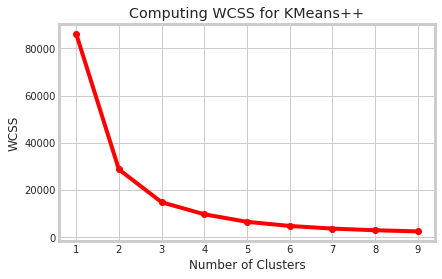

In [12]:
from sklearn.cluster import KMeans

# Use the Elbow method to find a good number of clusters using WCSS.
# We'll set the upper limit of k to 20 this time,
# to factor in the possibility of having 6 to 10 customer groups.
# Setting a higher number would cause time to run to increase,
# so some optimizations needs to considered for very large datasets

# !!Important Note: scale the upper limit with the number of groups you are expecting


wcss = []
for k in range( 1, 10 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(df_cluster)
    wcss.append( kmeans.inertia_ )
    
plt.plot(range(1, 10), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_cluster)

# As it's difficult to visualise clusters when the data is high-dimensional - we'll use
# boxplots to help us see how the clusters are grouping the samples

df_cluster["cluster"] = cluster_labels
df_cluster['cluster'].value_counts()


0    1035
2    1012
4     534
1     290
3     102
Name: cluster, dtype: int64

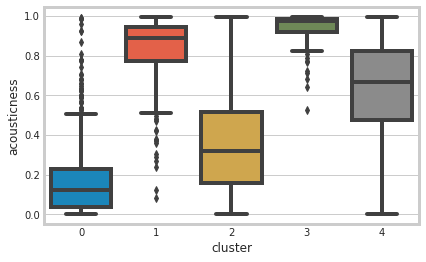

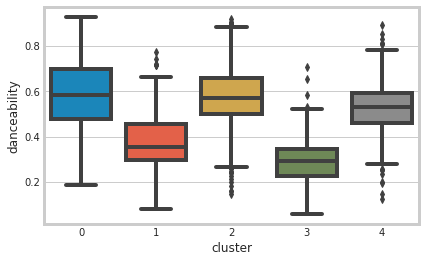

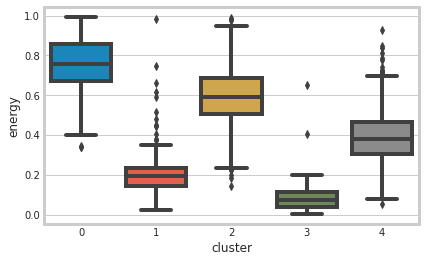

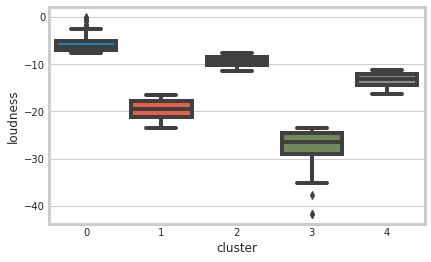

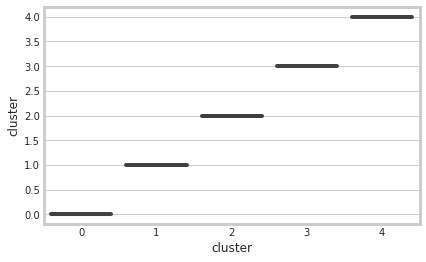

In [14]:
for col in df_cluster.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df_cluster)

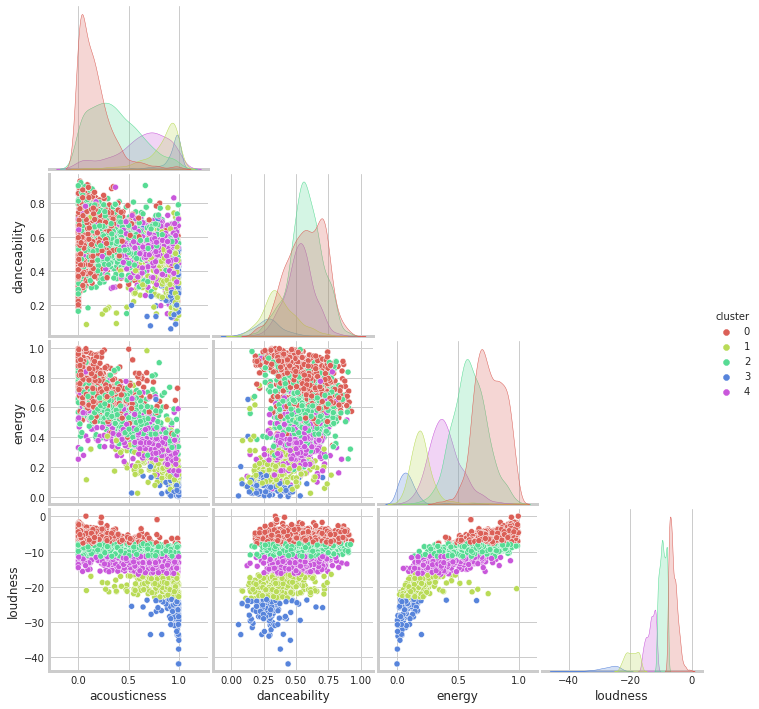

In [15]:
sns.pairplot(df_cluster, hue='cluster', palette=sns.color_palette('hls',5), corner=True)

Displaying samples from the clusters

In [16]:


labels = kmeans.labels_
df['labels']=labels

print(df[df['labels']==0].sample(10)['genres'])

print('--------')

labels = kmeans.labels_
df['labels']=labels

df[df['labels']==1].sample(10)['genres']

2212       post-post-hardcore
2471                 sierreno
1312                 hopebeat
2665    symphonic black metal
2175          pop electronico
2344              rock baiano
257           belarusian rock
2070              opera metal
1161             german house
1772              miami metal
Name: genres, dtype: object
--------


2069             opera chorus
979       english renaissance
422        canadian classical
1466           italian violin
413           cambridge choir
1634          latin classical
249               beat poetry
1553                jazz trio
646     classical performance
13                 acousmatic
Name: genres, dtype: object

Silhouetter Score

In [17]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_cluster, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.612


Bonus

In [18]:

def genre_recommender(x):

  x=df[df['genres']==x]['labels'].to_numpy()[0]  

  return df[df['labels']==x].sample(10)['genres'].to_numpy()

  




In [19]:
genre_recommender('haitian traditional')

array(['swedish jazz', 'japanese classical performance',
       'classical soprano', 'british choir', 'modern jazz trio', 'drone',
       'polish modern jazz', 'nordic soundtrack', 'late romantic era',
       'swedish choir'], dtype=object)